In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
data = pd.read_excel('flight data.xlsx')

In [208]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [209]:
# Size of the data
print('Rows: ',data.shape[0])
print('Columns: ',data.shape[1])

Rows:  10683
Columns:  11


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [211]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [212]:
data.describe(include='object').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


In [213]:
# Lets convert date of journey to datetime
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],
                                        format='%d/%m/%Y')

In [214]:
data['Journey_weekday'] = data['Date_of_Journey'].dt.weekday

In [215]:
data['Jouney_month'] = data['Date_of_Journey'].dt.month

In [216]:
data['Journey_weekday'].value_counts()

2    2079
0    1850
3    1832
5    1670
6    1474
4     909
1     869
Name: Journey_weekday, dtype: int64

In [217]:
data['Jouney_month'].value_counts()

5    3466
6    3414
3    2724
4    1079
Name: Jouney_month, dtype: int64

In [218]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [219]:
del data['Date_of_Journey']

In [220]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,6,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,4,3,1


In [221]:
route = data['Route'].value_counts()

In [222]:
thres = np.percentile(route,97)

In [223]:
data['Route'] = data['Route'].map(route.to_dict())

In [224]:
data['Route'] = np.where(data['Route']>thres,'Busy','Not Busy')

In [225]:
data['Route'].value_counts()

Busy        5631
Not Busy    5052
Name: Route, dtype: int64

In [226]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day
0,IndiGo,Banglore,New Delhi,Busy,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,6,3,24
1,Air India,Kolkata,Banglore,Not Busy,05:50,13:15,7h 25m,2 stops,No info,7662,2,5,1
2,Jet Airways,Delhi,Cochin,Not Busy,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,6,9
3,IndiGo,Kolkata,Banglore,Not Busy,18:05,23:30,5h 25m,1 stop,No info,6218,6,5,12
4,IndiGo,Banglore,New Delhi,Not Busy,16:50,21:35,4h 45m,1 stop,No info,13302,4,3,1


In [227]:
data['Dep_Time']=pd.to_datetime(data['Dep_Time'],format='%H:%M')

In [228]:
data['Dep_Hour'] = data['Dep_Time'].dt.hour

In [229]:
data['Dep_Min'] = data['Dep_Time'].dt.minute

In [230]:
del data['Dep_Time']

In [231]:
data['Arr_Hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arr_Min']=pd.to_datetime(data['Arrival_Time']).dt.minute

In [232]:
del data['Arrival_Time']

In [233]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,Busy,2h 50m,non-stop,No info,3897,6,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,Not Busy,7h 25m,2 stops,No info,7662,2,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,Not Busy,19h,2 stops,No info,13882,6,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,Not Busy,5h 25m,1 stop,No info,6218,6,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,Not Busy,4h 45m,1 stop,No info,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,2h 30m,non-stop,No info,4107,1,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,Busy,2h 35m,non-stop,No info,4145,5,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,Busy,3h,non-stop,No info,7229,5,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,Busy,2h 40m,non-stop,No info,12648,4,3,1,11,30,14,10


In [234]:
data[['Duration_h','Duration_m']] = data['Duration'].str.split(expand=True)

In [235]:
data['Duration_h']= data['Duration_h'].str.replace('h','')

In [236]:
data['Duration_m'] = data['Duration_m'].str.replace('m','')

In [237]:
data['Duration_h'].value_counts()

2     2402
1      621
3      501
7      487
5      481
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     265
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
35       7
36       7
31       6
47       2
42       2
39       2
5m       1
41       1
40       1
Name: Duration_h, dtype: int64

In [238]:
data[data['Duration_h']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_h,Duration_m
6474,Air India,Mumbai,Hyderabad,Not Busy,5m,2 stops,No info,17327,2,3,6,16,50,16,55,5m,None


In [239]:
data.drop(index=[6474],inplace=True)

In [240]:
data['Duration_h'] = data['Duration_h'].astype(int)

In [241]:
data['Duration_m'].fillna(0,inplace=True)

In [242]:
data['Duration_m'] = data['Duration_m'].astype(int)

In [243]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_h,Duration_m
0,IndiGo,Banglore,New Delhi,Busy,2h 50m,non-stop,No info,3897,6,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,Not Busy,7h 25m,2 stops,No info,7662,2,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,Not Busy,19h,2 stops,No info,13882,6,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,Not Busy,5h 25m,1 stop,No info,6218,6,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,Not Busy,4h 45m,1 stop,No info,13302,4,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,2h 30m,non-stop,No info,4107,1,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,Busy,2h 35m,non-stop,No info,4145,5,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,Busy,3h,non-stop,No info,7229,5,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,Busy,2h 40m,non-stop,No info,12648,4,3,1,11,30,14,10,2,40


In [244]:
data['Duration'] = (60*data['Duration_h']) + data['Duration_m']

In [245]:
data.drop(columns=['Duration_h','Duration_m'],inplace=True)

In [246]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,Busy,170,non-stop,No info,3897,6,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,Not Busy,445,2 stops,No info,7662,2,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,Not Busy,1140,2 stops,No info,13882,6,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,Not Busy,325,1 stop,No info,6218,6,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,Not Busy,285,1 stop,No info,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Busy,150,non-stop,No info,4107,1,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,Busy,155,non-stop,No info,4145,5,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,Busy,180,non-stop,No info,7229,5,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,Busy,160,non-stop,No info,12648,4,3,1,11,30,14,10


### DATA EXPLORATION

In [247]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_weekday', 'Jouney_month',
       'Journey_day', 'Dep_Hour', 'Dep_Min', 'Arr_Hour', 'Arr_Min'],
      dtype='object')

In [248]:
cat_cols = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Journey_weekday', 'Jouney_month',
       'Journey_day', 'Dep_Hour', 'Arr_Hour']

In [249]:
num_cols = ['Duration','Price']

### Univariate Analysis

In [250]:
import warnings
warnings.filterwarnings('ignore')

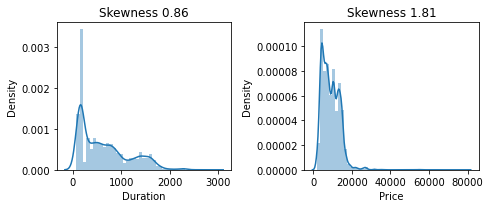

In [251]:
plt.figure(figsize=(7,3))
t=1
for i in num_cols:
    plt.subplot(1,2,t)
    plt.title('Skewness %.2f'%data[i].skew())
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

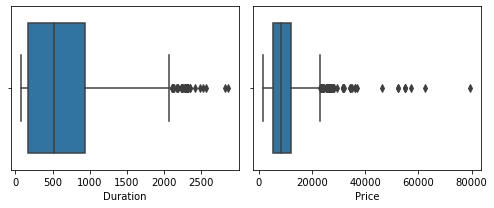

In [252]:
plt.figure(figsize=(7,3))
t=1
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

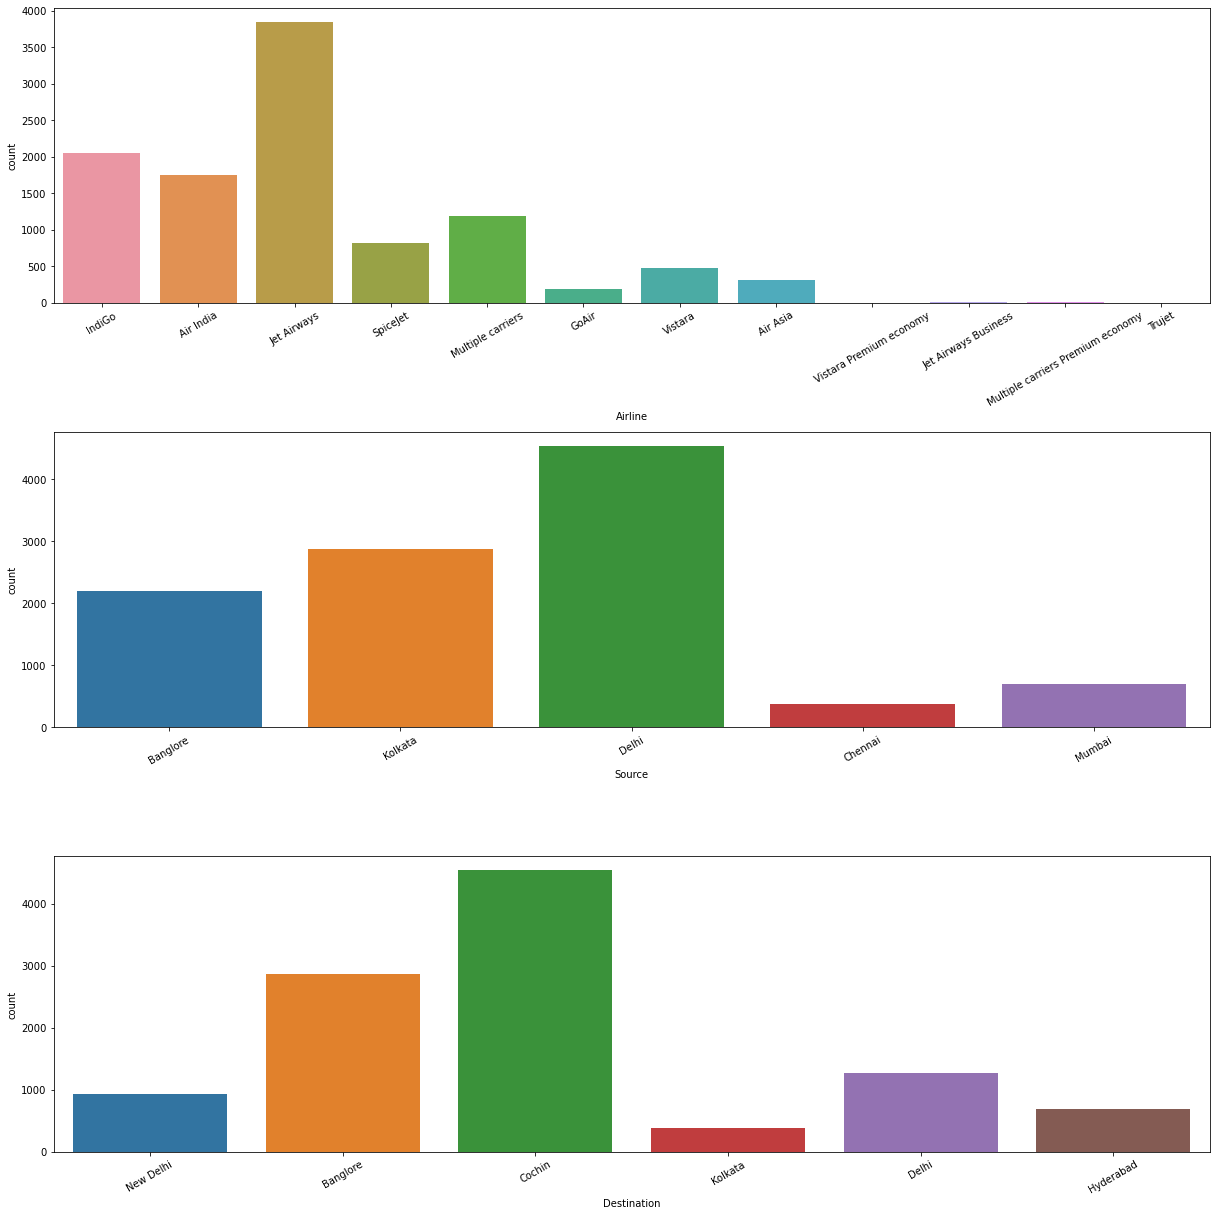

In [253]:
plt.figure(figsize=(17,17))
t=1
for i in cat_cols[:3]:
    plt.subplot(3,1,t)
    sns.countplot(data[i])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()   

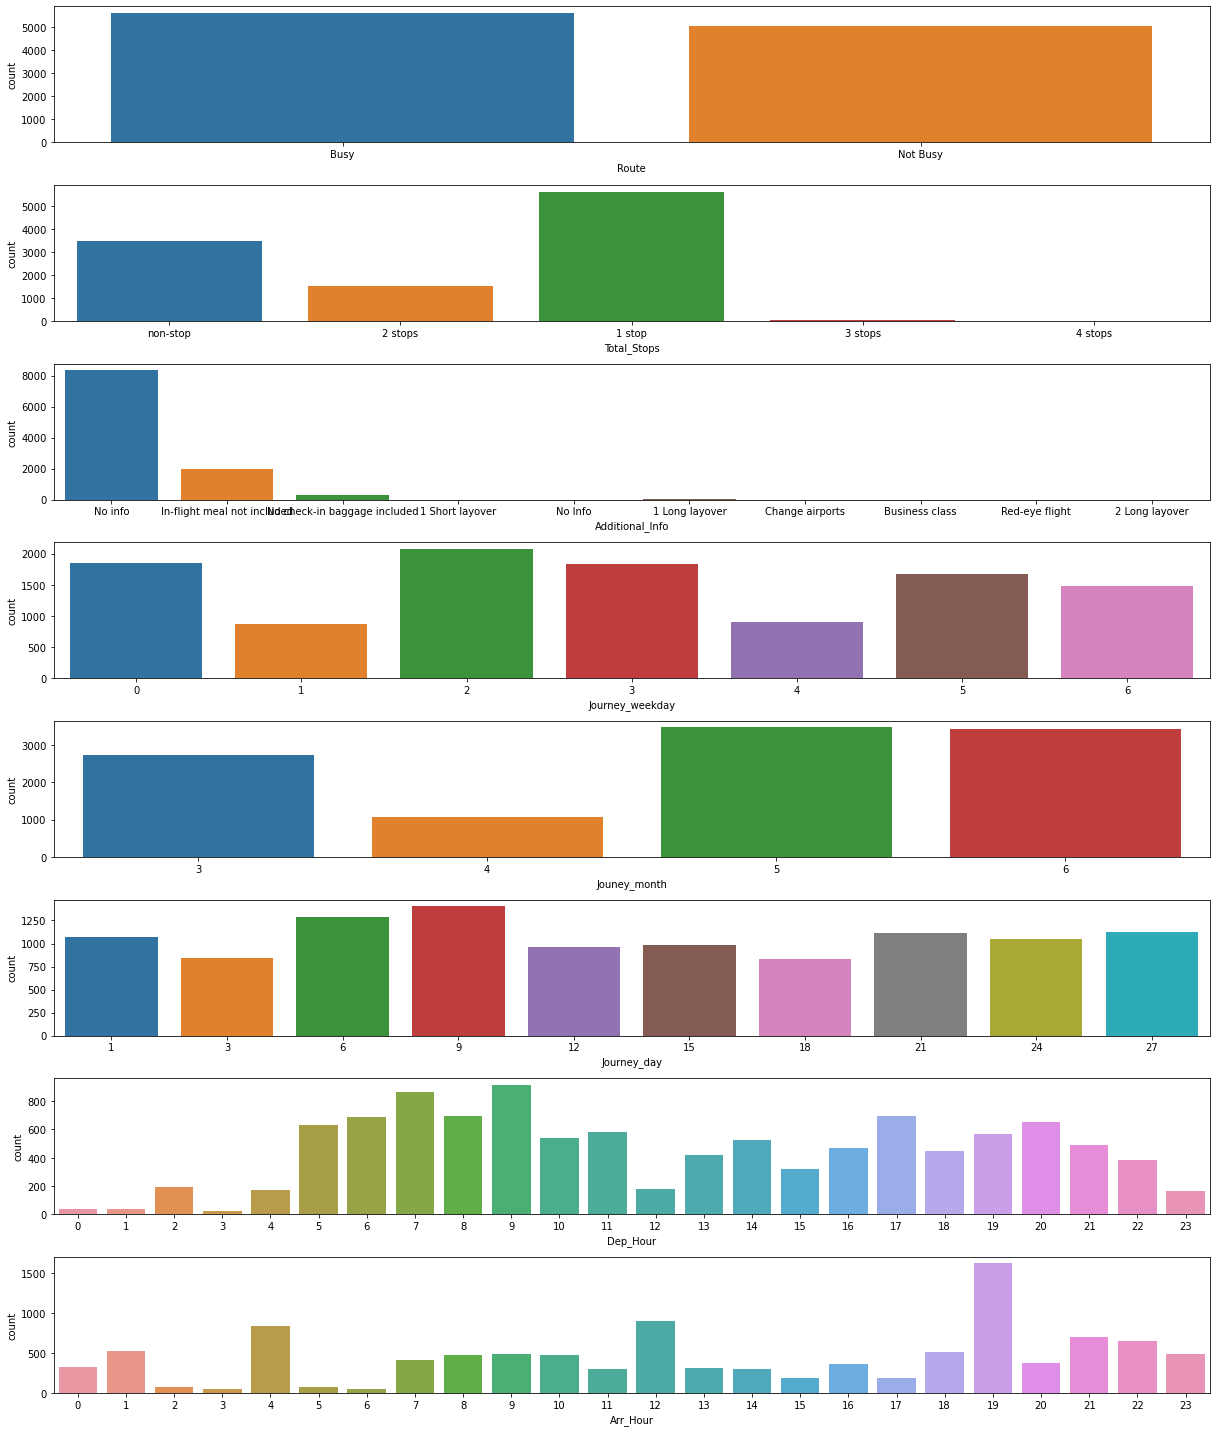

In [254]:
plt.figure(figsize=(17,20))
t=1
for i in cat_cols[3:]:
    plt.subplot(8,1,t)
    sns.countplot(data[i])
    t+=1
plt.tight_layout()
plt.show()   

### Bivariate Analysis

In [255]:
# Number vs number

<AxesSubplot:xlabel='Duration', ylabel='Price'>

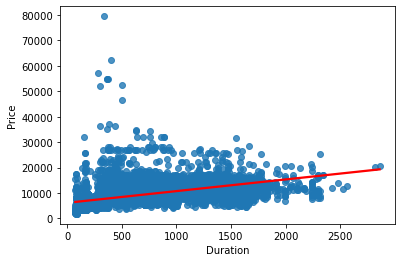

In [256]:
sns.regplot(data['Duration'],data['Price'],line_kws={'color':'red'})

In [257]:
data[['Duration','Price']].corr()

,Duration,Price
Duration,1.000000,0.506695
Price,0.506695,1.000000


In [258]:
# Let us prove statistically, that we have any relation between duration
# and price, We will use two sample t test

In [259]:
# Lets check for the assumptions

In [260]:
import scipy.stats as stats

In [261]:
# Lets check the normality of the data
# Shapiro test
# Ho: Sample is normal
# Ha: Sample is not normal
print(stats.shapiro(data['Duration']),stats.shapiro(data['Price']))

ShapiroResult(statistic=0.8885241150856018, pvalue=0.0) ShapiroResult(statistic=0.8955315947532654, pvalue=0.0)


In [262]:
# Since p-value is less than 0.05 We have to reject the Ho: 
# that Data is not normal

In [263]:
# Ho: The variances are equal
# Ha: The variance are not equal
stats.levene(data['Duration'],data['Price'])

LeveneResult(statistic=12513.256962881536, pvalue=0.0)

In [264]:
# Since p-value is less than 0.05 We have to reject the Ho: 
# the variances are different

In [265]:
# Since the assumptions have failed we have to use non parametric test
# mannwhitneyu test
# Ho: The two samples are independent
# Ha: The two samples are dependent

In [266]:
stats.mannwhitneyu(data['Duration'],data['Price'])

MannwhitneyuResult(statistic=12029.5, pvalue=0.0)

In [267]:
# We have to reject the ho: 
# hence we will say that price is affected by duration

In [268]:
# Category and number

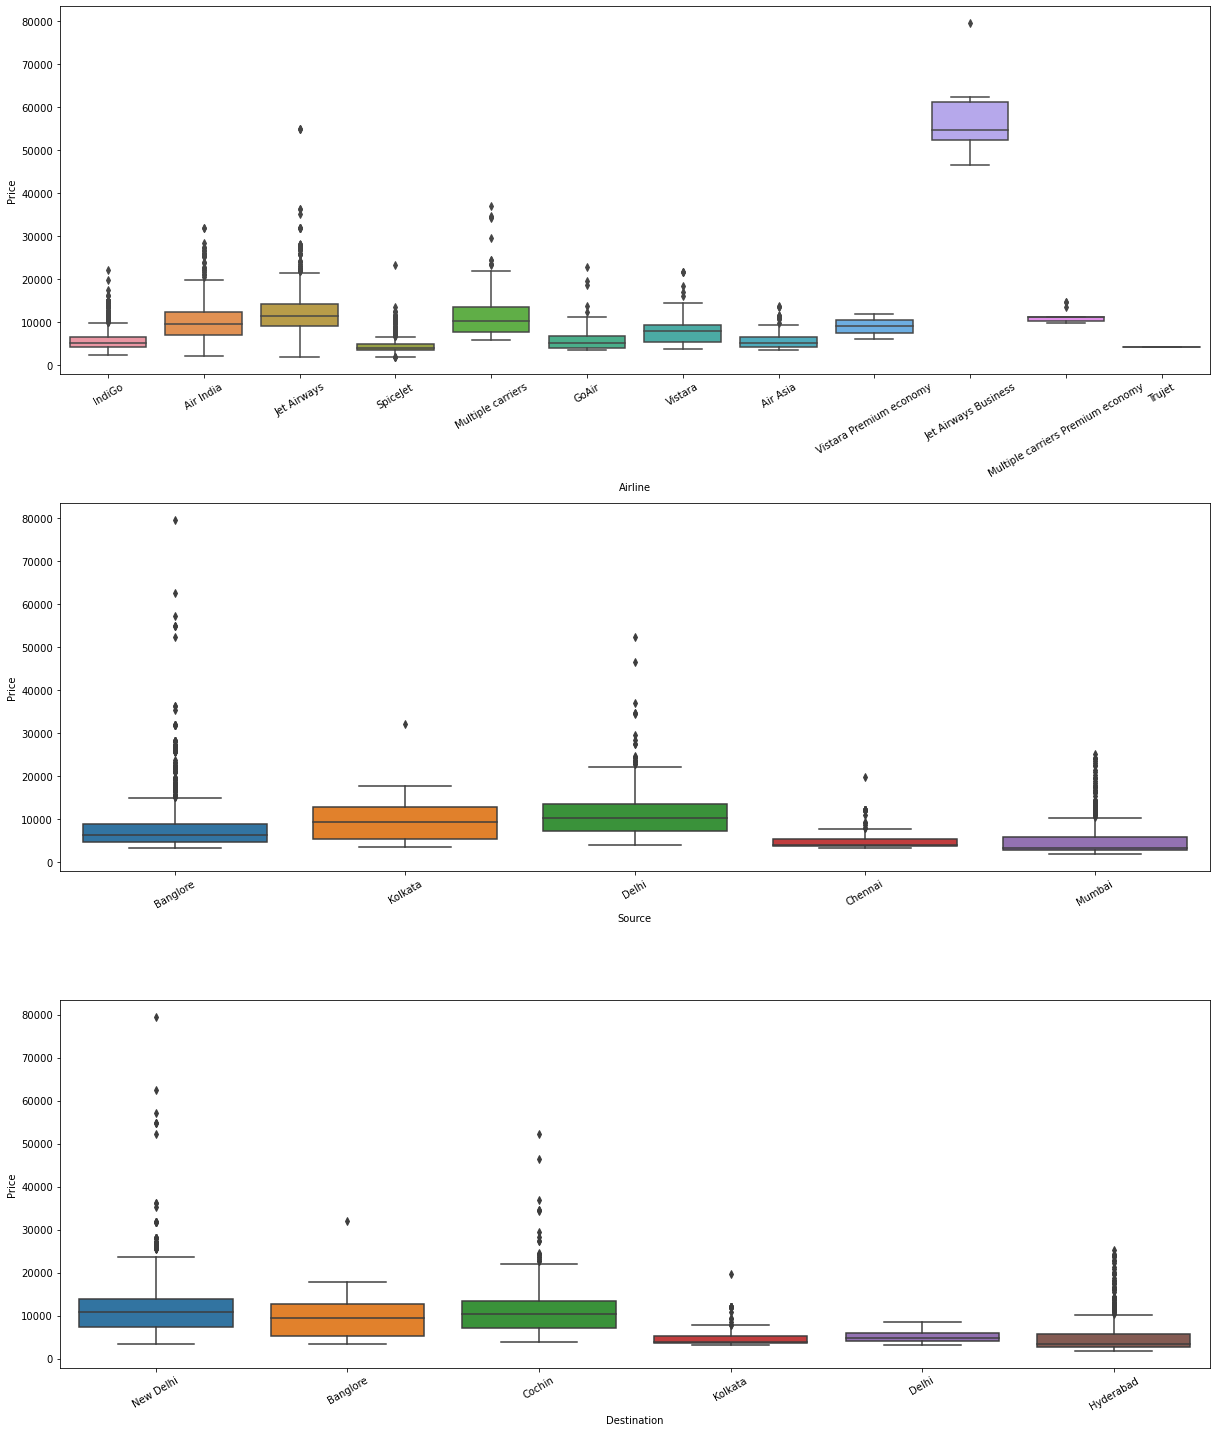

In [269]:
plt.figure(figsize=(17,20))
t=1
for i in cat_cols[:3]:
    plt.subplot(3,1,t)
    sns.boxplot(data[i],data['Price'])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

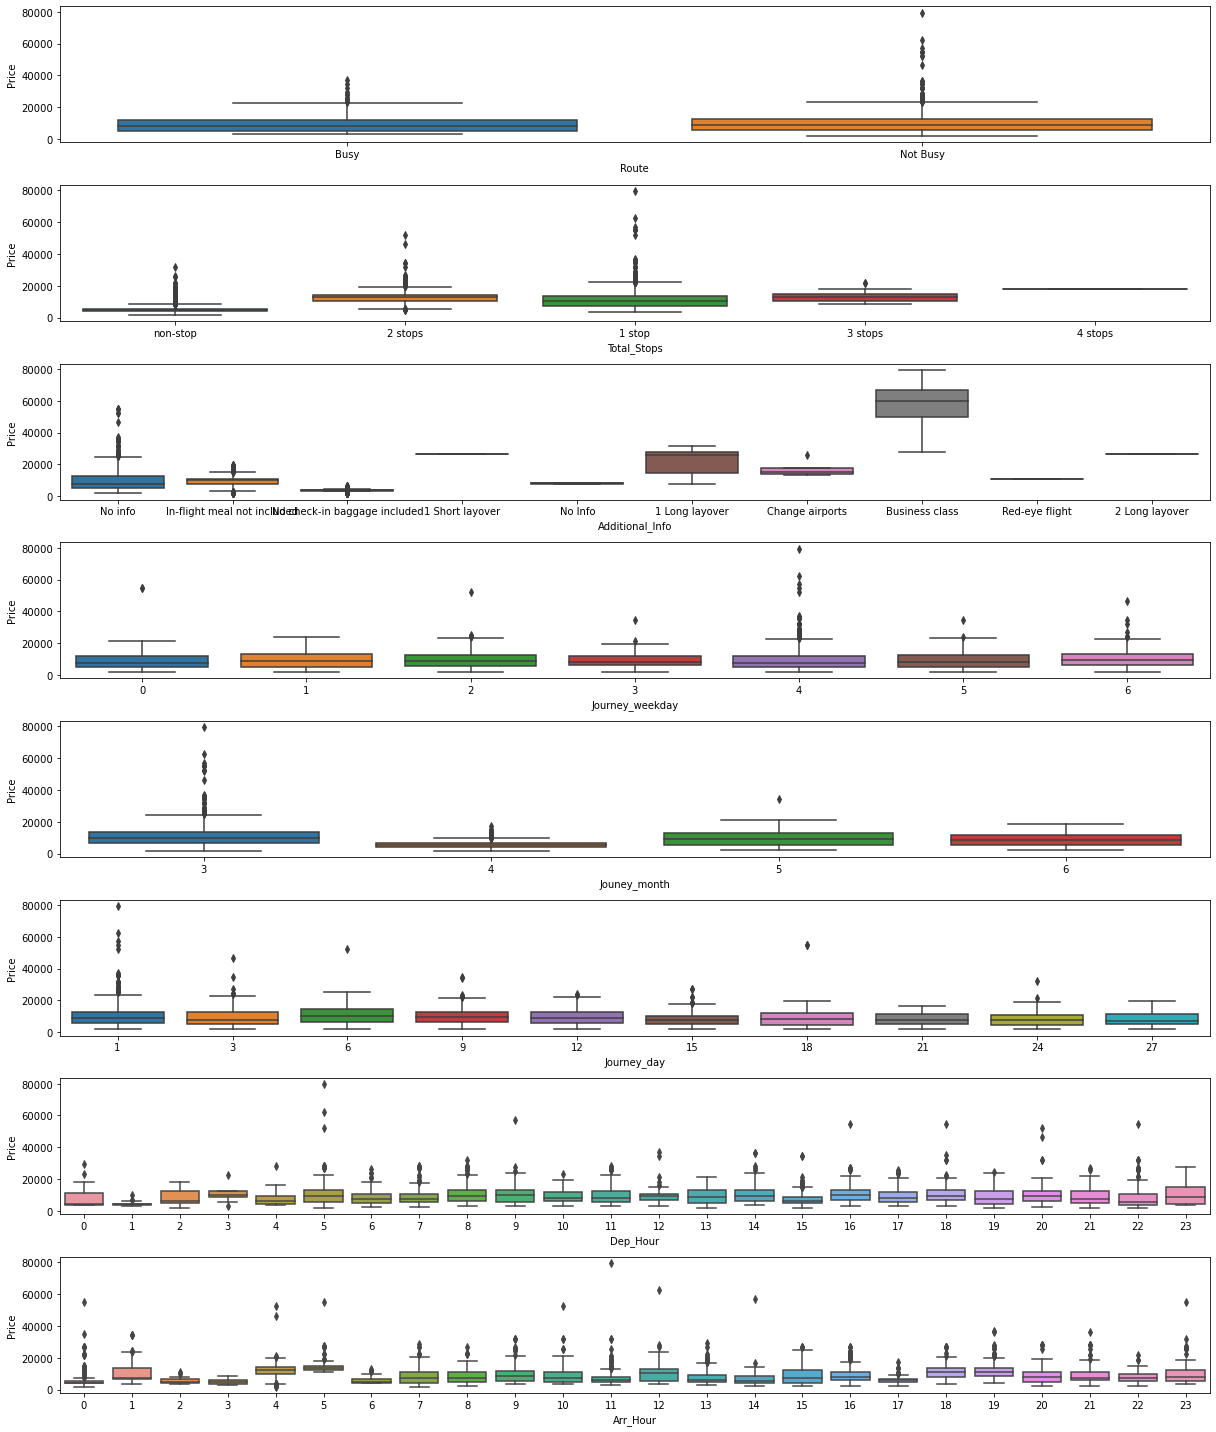

In [270]:
plt.figure(figsize=(17,20))
t=1
for i in cat_cols[3:]:
    plt.subplot(8,1,t)
    sns.boxplot(data[i],data['Price'])
    t+=1
plt.tight_layout()
plt.show()

In [271]:
# Let us proove statistically relation b/w route and price

In [272]:
samp1 = data[data['Route']=='Busy']['Price']
samp2 = data[data['Route']=='Not Busy']['Price']

In [273]:
samp1.mean()

8737.910140294796

In [274]:
samp2.mean()

9474.679667392595

In [275]:
# Lets check the assumptions before two sample t-test

In [276]:
# Normality
stats.shapiro(samp1),stats.shapiro(samp2)

(ShapiroResult(statistic=0.9249293804168701, pvalue=0.0),
 ShapiroResult(statistic=0.8697774410247803, pvalue=0.0))

In [277]:
# data is not normal

In [278]:
stats.levene(samp1,samp2)

LeveneResult(statistic=63.79545288586486, pvalue=1.5222074433859608e-15)

In [279]:
# Ho: The samples are independent
# Ha: The samples are dependent
stats.mannwhitneyu(samp1,samp2)

MannwhitneyuResult(statistic=13242520.5, pvalue=7.75642822472856e-10)

In [280]:
# Since p value is less than 0.05 we have to reject the ho:
# We can say that route has affect on price

In [281]:
# Lets check the dependency between stops and price

In [282]:
# Lets check assumptions for anova
stats.shapiro(data['Price'])

ShapiroResult(statistic=0.8955315947532654, pvalue=0.0)

In [283]:
s1 = data[data['Total_Stops']=='non-stop']['Price']
s2 = data[data['Total_Stops']=='1 stop']['Price']
s3 = data[data['Total_Stops']=='2 stops']['Price']
s4 = data[data['Total_Stops']=='3 stops']['Price']
s5 = data[data['Total_Stops']=='4 stops']['Price']

In [284]:
# Ho: Variances are same (category has no effect on number)
# Ha: Variances are different (There is an effect of category on number)
stats.kruskal(s1,s2,s3,s4,s5)

KruskalResult(statistic=5749.841918443617, pvalue=0.0)

In [285]:
# Since p value is less than 0.05, we have to reject the Ho:
# hence total stops has effect on price

## Missing Value Treatment

In [286]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_weekday    0
Jouney_month       0
Journey_day        0
Dep_Hour           0
Dep_Min            0
Arr_Hour           0
Arr_Min            0
dtype: int64

In [287]:
data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
9039,Air India,Delhi,Cochin,Not Busy,1420,NaN,No info,7480,0,5,6,9,45,9,25


In [288]:
# let us drop this row
data.drop(index=[9039],inplace=True)

In [289]:
data.shape

(10681, 15)

In [290]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_weekday    0
Jouney_month       0
Journey_day        0
Dep_Hour           0
Dep_Min            0
Arr_Hour           0
Arr_Min            0
dtype: int64

## Outlier Treatment

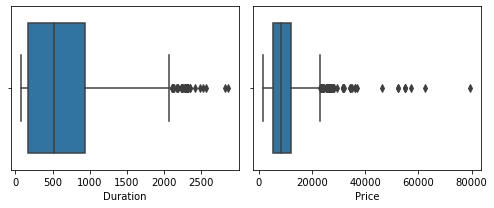

In [291]:
plt.figure(figsize=(7,3))
t=1
for i in num_cols:
    plt.subplot(1,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [292]:
data[data['Duration']>2000]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
226,Jet Airways,Delhi,Cochin,Not Busy,2245,2 stops,No info,18799,6,3,3,5,25,18,50
470,Jet Airways,Delhi,Cochin,Not Busy,2045,2 stops,No info,13082,3,3,21,18,20,4,25
553,Air India,Delhi,Cochin,Not Busy,2295,2 stops,No info,10598,5,3,9,5,0,19,15
919,Air India,Kolkata,Banglore,Not Busy,2115,3 stops,No info,10991,6,5,12,12,0,23,15
925,Jet Airways,Delhi,Cochin,Not Busy,2135,2 stops,No info,19907,2,3,6,16,50,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9848,Air India,Banglore,New Delhi,Not Busy,2345,2 stops,No info,17135,4,3,1,8,50,23,55
10020,Air India,Delhi,Cochin,Not Busy,2295,2 stops,No info,9653,3,5,9,5,0,19,15
10326,Air India,Banglore,New Delhi,Not Busy,2420,2 stops,No info,11791,6,3,3,5,50,22,10
10456,Jet Airways,Delhi,Cochin,Not Busy,2860,2 stops,No info,20694,2,3,6,19,10,18,50


## Encoding and Feature Tranformation

In [293]:
# We are performing frequency encoding in Airline ,Source and Destination

In [294]:
te = data.groupby(by=['Airline'])['Price'].mean()

In [295]:
te = te/sum(te)
te

Airline
Air Asia                             0.038742
Air India                            0.066586
GoAir                                0.040619
IndiGo                               0.039320
Jet Airways                          0.080696
Jet Airways Business                 0.404443
Multiple carriers                    0.075559
Multiple carriers Premium economy    0.079136
SpiceJet                             0.030066
Trujet                               0.028691
Vistara                              0.054031
Vistara Premium economy              0.062112
Name: Price, dtype: float64

In [296]:
data['Airline'] = data['Airline'].map(te.to_dict())

In [297]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.039320,Banglore,New Delhi,Busy,170,non-stop,No info,3897,6,3,24,22,20,1,10
1,0.066586,Kolkata,Banglore,Not Busy,445,2 stops,No info,7662,2,5,1,5,50,13,15
2,0.080696,Delhi,Cochin,Not Busy,1140,2 stops,No info,13882,6,6,9,9,25,4,25
3,0.039320,Kolkata,Banglore,Not Busy,325,1 stop,No info,6218,6,5,12,18,5,23,30
4,0.039320,Banglore,New Delhi,Not Busy,285,1 stop,No info,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.038742,Kolkata,Banglore,Busy,150,non-stop,No info,4107,1,4,9,19,55,22,25
10679,0.066586,Kolkata,Banglore,Busy,155,non-stop,No info,4145,5,4,27,20,45,23,20
10680,0.080696,Banglore,Delhi,Busy,180,non-stop,No info,7229,5,4,27,8,20,11,20
10681,0.054031,Banglore,New Delhi,Busy,160,non-stop,No info,12648,4,3,1,11,30,14,10


In [298]:
for i in ['Source','Destination']:
    d = data[i].value_counts(normalize=True).to_dict()
    data[i] = data[i].map(d)

In [299]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.039320,0.205692,0.087258,Busy,170,non-stop,No info,3897,6,3,24,22,20,1,10
1,0.066586,0.268795,0.268795,Not Busy,445,2 stops,No info,7662,2,5,1,5,50,13,15
2,0.080696,0.424679,0.424679,Not Busy,1140,2 stops,No info,13882,6,6,9,9,25,4,25
3,0.039320,0.268795,0.268795,Not Busy,325,1 stop,No info,6218,6,5,12,18,5,23,30
4,0.039320,0.205692,0.087258,Not Busy,285,1 stop,No info,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.038742,0.268795,0.268795,Busy,150,non-stop,No info,4107,1,4,9,19,55,22,25
10679,0.066586,0.268795,0.268795,Busy,155,non-stop,No info,4145,5,4,27,20,45,23,20
10680,0.080696,0.205692,0.118435,Busy,180,non-stop,No info,7229,5,4,27,8,20,11,20
10681,0.054031,0.205692,0.087258,Busy,160,non-stop,No info,12648,4,3,1,11,30,14,10


In [300]:
# Label encoding in Route
data['Route'] = data['Route'].map({'Busy':1,'Not Busy':0})

In [301]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.039320,0.205692,0.087258,1,170,non-stop,No info,3897,6,3,24,22,20,1,10
1,0.066586,0.268795,0.268795,0,445,2 stops,No info,7662,2,5,1,5,50,13,15
2,0.080696,0.424679,0.424679,0,1140,2 stops,No info,13882,6,6,9,9,25,4,25
3,0.039320,0.268795,0.268795,0,325,1 stop,No info,6218,6,5,12,18,5,23,30
4,0.039320,0.205692,0.087258,0,285,1 stop,No info,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.038742,0.268795,0.268795,1,150,non-stop,No info,4107,1,4,9,19,55,22,25
10679,0.066586,0.268795,0.268795,1,155,non-stop,No info,4145,5,4,27,20,45,23,20
10680,0.080696,0.205692,0.118435,1,180,non-stop,No info,7229,5,4,27,8,20,11,20
10681,0.054031,0.205692,0.087258,1,160,non-stop,No info,12648,4,3,1,11,30,14,10


In [302]:
data['Total_Stops']= data['Total_Stops'].map({'non-stop':0,
                                             '1 stop':1,
                                             '2 stops':2,
                                             '3 stops':3,
                                             '4 stops':4})

In [303]:
data['Additional_Info'] = data['Additional_Info'].replace({'No Info':'No info'})

In [305]:
data['Additional_Info'].value_counts()

No info                         8346
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [308]:
# Lets do target encoding
te = data.groupby(by=['Additional_Info'])['Price'].mean()

In [309]:
te = te/sum(te)

In [310]:
data['Additional_Info'] = data['Additional_Info'].map(te.to_dict())

In [311]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.039320,0.205692,0.087258,1,170,0,0.0502,3897,6,3,24,22,20,1,10
1,0.066586,0.268795,0.268795,0,445,2,0.0502,7662,2,5,1,5,50,13,15
2,0.080696,0.424679,0.424679,0,1140,2,0.0502,13882,6,6,9,9,25,4,25
3,0.039320,0.268795,0.268795,0,325,1,0.0502,6218,6,5,12,18,5,23,30
4,0.039320,0.205692,0.087258,0,285,1,0.0502,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.038742,0.268795,0.268795,1,150,0,0.0502,4107,1,4,9,19,55,22,25
10679,0.066586,0.268795,0.268795,1,155,0,0.0502,4145,5,4,27,20,45,23,20
10680,0.080696,0.205692,0.118435,1,180,0,0.0502,7229,5,4,27,8,20,11,20
10681,0.054031,0.205692,0.087258,1,160,0,0.0502,12648,4,3,1,11,30,14,10


### Transformation

In [312]:
data['Duration'].describe()

count    10681.000000
mean       643.080236
std        507.816377
min         75.000000
25%        170.000000
50%        520.000000
75%        930.000000
max       2860.000000
Name: Duration, dtype: float64

In [317]:
from sklearn.preprocessing import PowerTransformer

In [318]:
pt = PowerTransformer(standardize=False)

In [321]:
data['Duration']=pt.fit_transform(pd.DataFrame(data['Duration']))

In [322]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.039320,0.205692,0.087258,1,7.057306,0,0.0502,3897,6,3,24,22,20,1,10
1,0.066586,0.268795,0.268795,0,8.911927,2,0.0502,7662,2,5,1,5,50,13,15
2,0.080696,0.424679,0.424679,0,10.943134,2,0.0502,13882,6,6,9,9,25,4,25
3,0.039320,0.268795,0.268795,0,8.282489,1,0.0502,6218,6,5,12,18,5,23,30
4,0.039320,0.205692,0.087258,0,8.026369,1,0.0502,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.038742,0.268795,0.268795,1,6.831600,0,0.0502,4107,1,4,9,19,55,22,25
10679,0.066586,0.268795,0.268795,1,6.890395,0,0.0502,4145,5,4,27,20,45,23,20
10680,0.080696,0.205692,0.118435,1,7.161537,0,0.0502,7229,5,4,27,8,20,11,20
10681,0.054031,0.205692,0.087258,1,6.947549,0,0.0502,12648,4,3,1,11,30,14,10


<AxesSubplot:title={'center':'Skewness: -0.04'}, xlabel='Duration', ylabel='Density'>

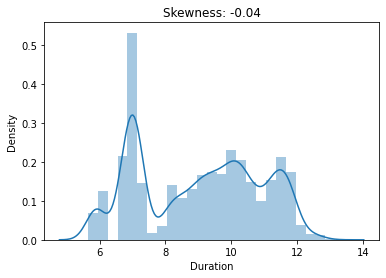

In [324]:
plt.title('Skewness: %.2f'%data['Duration'].skew())
sns.distplot(data['Duration'])

<AxesSubplot:xlabel='Duration'>

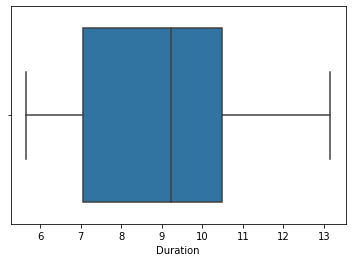

In [325]:
sns.boxplot(data['Duration'])

In [326]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_weekday,Jouney_month,Journey_day,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,0.039320,0.205692,0.087258,1,7.057306,0,0.0502,3897,6,3,24,22,20,1,10
1,0.066586,0.268795,0.268795,0,8.911927,2,0.0502,7662,2,5,1,5,50,13,15
2,0.080696,0.424679,0.424679,0,10.943134,2,0.0502,13882,6,6,9,9,25,4,25
3,0.039320,0.268795,0.268795,0,8.282489,1,0.0502,6218,6,5,12,18,5,23,30
4,0.039320,0.205692,0.087258,0,8.026369,1,0.0502,13302,4,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.038742,0.268795,0.268795,1,6.831600,0,0.0502,4107,1,4,9,19,55,22,25
10679,0.066586,0.268795,0.268795,1,6.890395,0,0.0502,4145,5,4,27,20,45,23,20
10680,0.080696,0.205692,0.118435,1,7.161537,0,0.0502,7229,5,4,27,8,20,11,20
10681,0.054031,0.205692,0.087258,1,6.947549,0,0.0502,12648,4,3,1,11,30,14,10


## Train Test Split

In [329]:
x = data.drop(columns=['Price'])
y = data['Price']

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2)

In [333]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(8544, 14) (8544,) (2137, 14) (2137,)


In [334]:
from sklearn.preprocessing import StandardScaler

In [335]:
se = StandardScaler()

In [337]:
se.fit(pd.DataFrame(x_train['Duration']))

StandardScaler()

In [339]:
se.mean_

array([9.00662256])

In [340]:
se.var_

array([3.37845878])

In [343]:
se.transform(pd.DataFrame(x_train['Duration']))

array([[ 0.00936746],
       [-1.66518888],
       [ 1.15339662],
       ...,
       [ 0.08998307],
       [ 0.91037662],
       [ 0.21737809]])

In [344]:
se.transform(pd.DataFrame(x_test['Duration']))

array([[-1.66518888],
       [-1.08999015],
       [-1.71720668],
       ...,
       [-1.08999015],
       [ 0.73022912],
       [ 1.75833732]])